<a href="https://colab.research.google.com/github/kunaldrafts25/flights/blob/main/flight2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
import kagglehub

path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flight-delay-and-cancellation-dataset-2019-2023


In [3]:
flights=pd.read_csv(path + '/flights_sample_3m.csv', na_values=['-'])

In [4]:
flights.shape
flights

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [6]:
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
flights = flights[flights['FL_DATE'].dt.year >= 2022]

In [7]:
flights.isna().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_DOT,0
AIRLINE_CODE,0
DOT_CODE,0
FL_NUMBER,0
ORIGIN,0
ORIGIN_CITY,0
DEST,0
DEST_CITY,0


In [8]:
flights[flights['ARR_DELAY'].isna()]

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
45,2022-01-02,Republic Airline,Republic Airline: YX,YX,20452,3467,ORD,"Chicago, IL",DCA,"Washington, DC",1935,NaN,NaN,NaN,NaN,NaN,NaN,2241,NaN,NaN,1.0,B,0.0,126.0,NaN,NaN,612.0,NaN,NaN,NaN,NaN,NaN
367,2022-06-09,JetBlue Airways,JetBlue Airways: B6,B6,20409,1319,BOS,"Boston, MA",MIA,"Miami, FL",1408,NaN,NaN,NaN,NaN,NaN,NaN,1737,NaN,NaN,1.0,A,0.0,209.0,NaN,NaN,1258.0,NaN,NaN,NaN,NaN,NaN
658,2022-01-03,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5596,SBA,"Santa Barbara, CA",LAX,"Los Angeles, CA",600,NaN,NaN,NaN,NaN,NaN,NaN,701,NaN,NaN,1.0,C,0.0,61.0,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN
972,2022-06-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1143,SEA,"Seattle, WA",ANC,"Anchorage, AK",731,NaN,NaN,NaN,NaN,NaN,NaN,1007,NaN,NaN,1.0,A,0.0,216.0,NaN,NaN,1448.0,NaN,NaN,NaN,NaN,NaN
996,2022-03-26,Horizon Air,Horizon Air: QX,QX,19687,2149,ANC,"Anchorage, AK",FAI,"Fairbanks, AK",2030,NaN,NaN,NaN,NaN,NaN,NaN,2135,NaN,NaN,1.0,A,0.0,65.0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999346,2022-02-03,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,676,EWR,"Newark, NJ",AUS,"Austin, TX",2010,NaN,NaN,NaN,NaN,NaN,NaN,2334,NaN,NaN,1.0,B,0.0,264.0,NaN,NaN,1504.0,NaN,NaN,NaN,NaN,NaN
2999396,2022-08-08,Republic Airline,Republic Airline: YX,YX,20452,4739,ILM,"Wilmington, NC",ORD,"Chicago, IL",1246,NaN,NaN,NaN,NaN,NaN,NaN,1414,NaN,NaN,1.0,B,0.0,148.0,NaN,NaN,760.0,NaN,NaN,NaN,NaN,NaN
2999654,2022-08-30,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,528,DCA,"Washington, DC",BNA,"Nashville, TN",1535,NaN,NaN,NaN,NaN,NaN,NaN,1625,NaN,NaN,1.0,B,0.0,110.0,NaN,NaN,562.0,NaN,NaN,NaN,NaN,NaN
2999711,2022-12-20,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,1477,SFO,"San Francisco, CA",SEA,"Seattle, WA",1220,NaN,NaN,NaN,NaN,NaN,NaN,1438,NaN,NaN,1.0,A,0.0,138.0,NaN,NaN,679.0,NaN,NaN,NaN,NaN,NaN


In [9]:
arrival_na = flights[flights['ARR_DELAY'].isna()]
arrival_na['CANCELLED'].value_counts()

,count
CANCELLED,
1.0,26257
0.0,2913


In [10]:
flights = flights[ ~flights['ARR_DELAY'].isna()]
flights.shape

(1122174, 32)

In [11]:
flights.isna().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_DOT,0
AIRLINE_CODE,0
DOT_CODE,0
FL_NUMBER,0
ORIGIN,0
ORIGIN_CITY,0
DEST,0
DEST_CITY,0


In [12]:
flights = flights[['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']]

In [13]:
flights[['DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']] = flights[['DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']].fillna(0)
flights

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0.0,0.0,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0.0,0.0,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999989,2023-05-29,Republic Airline,Republic Airline: YX,YX,20452,4644,PWM,"Portland, ME",DCA,"Washington, DC",550,550.0,0.0,8.0,558.0,718.0,15.0,747,733.0,-14.0,0.0,0.0,117.0,103.0,80.0,482.0,0.0,0.0,0.0,0.0,0.0
2999990,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0.0,0.0,78.0,92.0,55.0,311.0,0.0,0.0,0.0,0.0,0.0
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,0.0,85.0,71.0,55.0,328.0,0.0,0.0,0.0,0.0,0.0
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,0.0,176.0,145.0,130.0,977.0,0.0,0.0,0.0,0.0,0.0


In [14]:
flights = flights[['FL_DATE', 'AIRLINE_CODE','DEST','ORIGIN','DISTANCE',
       'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
flights['MONTH'] = flights['FL_DATE'].dt.month
flights['DAY'] = flights['FL_DATE'].dt.dayofweek
flights['YEAR'] = flights['FL_DATE'].dt.year
flights['CRS_DEP_HOUR'] = flights['CRS_DEP_TIME'] // 100
flights['CRS_ARR_HOUR'] = flights['CRS_ARR_TIME'] // 100
flights['PEAK_HOUR'] = flights['CRS_DEP_HOUR'].apply(lambda x: 1 if 6 <= x <= 9 or 16 <= x <=19 else 0)


<ipython-input-14-f1315b87db18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
<ipython-input-14-f1315b87db18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['MONTH'] = flights['FL_DATE'].dt.month
<ipython-input-14-f1315b87db18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

array([[<Axes: title={'center': 'FL_DATE'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>,
        <Axes: title={'center': 'CRS_ARR_TIME'}>],
       [<Axes: title={'center': 'DELAY_DUE_CARRIER'}>,
        <Axes: title={'center': 'DELAY_DUE_WEATHER'}>,
        <Axes: title={'center': 'DELAY_DUE_NAS'}>,
        <Axes: title={'center': 'DELAY_DUE_SECURITY'}>],
       [<Axes: title={'center': 'DELAY_DUE_LATE_AIRCRAFT'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'YEAR'}>],
       [<Axes: title={'center': 'CRS_DEP_HOUR'}>,
        <Axes: title={'center': 'CRS_ARR_HOUR'}>,
        <Axes: title={'center': 'PEAK_HOUR'}>, <Axes: >]], dtype=object)

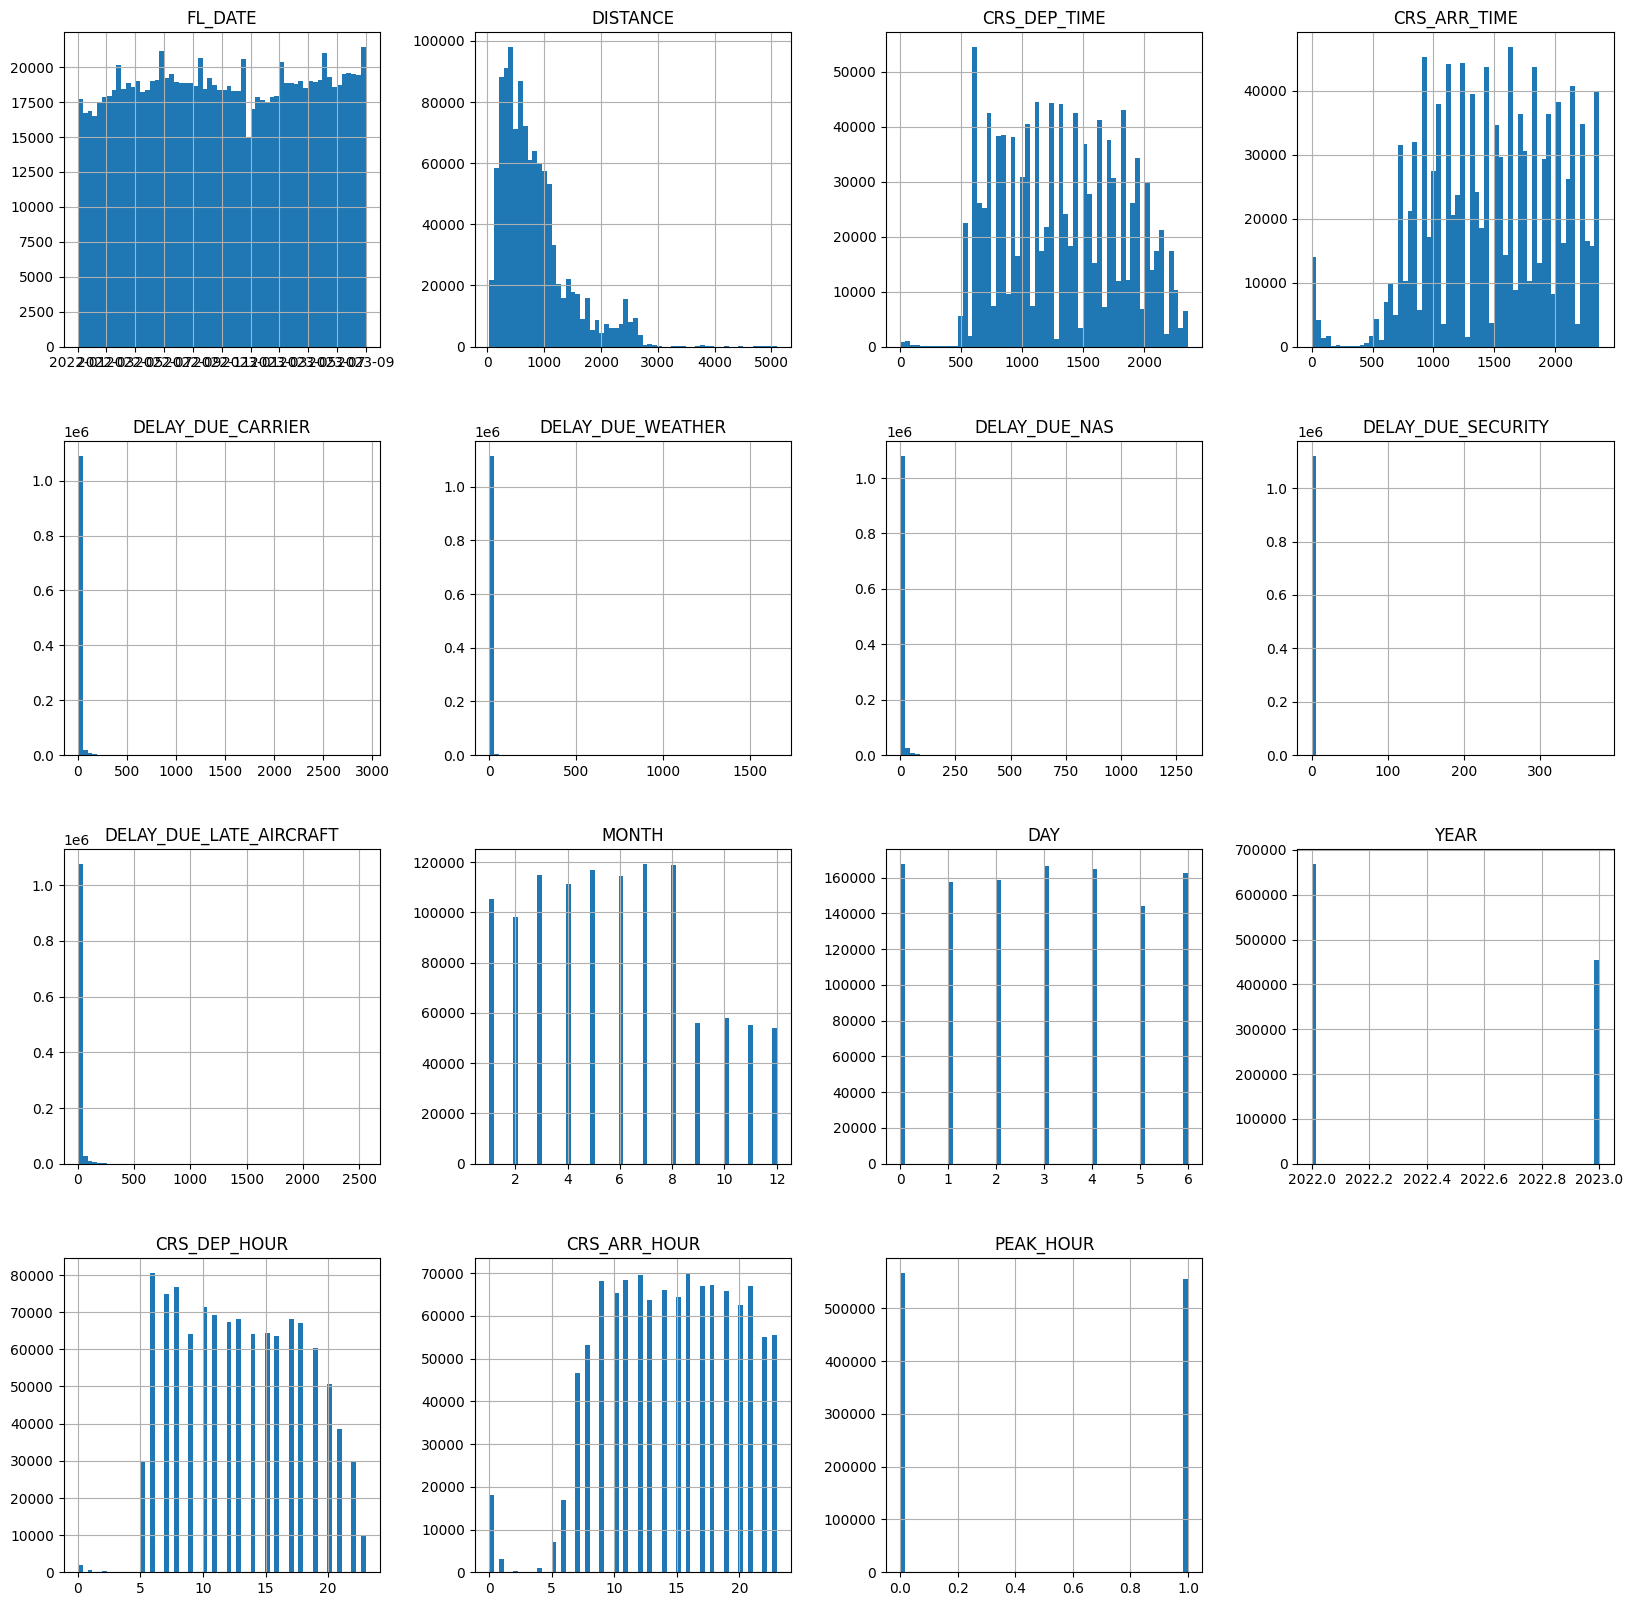

In [15]:
flights.hist(bins = 60, figsize=(20,20))

In [16]:
flights.dtypes

,0
FL_DATE,datetime64[ns]
AIRLINE_CODE,object
DEST,object
ORIGIN,object
DISTANCE,float64
CRS_DEP_TIME,int64
CRS_ARR_TIME,int64
DELAY_DUE_CARRIER,float64
DELAY_DUE_WEATHER,float64
DELAY_DUE_NAS,float64


In [17]:
flights.columns

Index(['FL_DATE', 'AIRLINE_CODE', 'DEST', 'ORIGIN', 'DISTANCE', 'CRS_DEP_TIME',
       'CRS_ARR_TIME', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'MONTH', 'DAY', 'YEAR', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'PEAK_HOUR'],
      dtype='object')

In [18]:
flights['all_delay'] = flights[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1)
flights['delayed'] = np.where(flights['all_delay'] > 0,1,0)

<ipython-input-18-7bd25a95d40e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['all_delay'] = flights[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']].sum(axis=1)
<ipython-input-18-7bd25a95d40e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['delayed'] = np.where(flights['all_delay'] > 0,1,0)


In [19]:
flights


,FL_DATE,AIRLINE_CODE,DEST,ORIGIN,DISTANCE,CRS_DEP_TIME,CRS_ARR_TIME,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,MONTH,DAY,YEAR,CRS_DEP_HOUR,CRS_ARR_HOUR,PEAK_HOUR,all_delay,delayed
1,2022-11-19,DL,SEA,MSP,1399.0,2120,2315,0.0,0.0,0.0,0.0,0.0,11,5,2022,21,23,0,0.0,0
2,2022-07-22,UA,MSP,DEN,680.0,954,1252,0.0,0.0,0.0,0.0,0.0,7,4,2022,9,12,1,0.0,0
3,2023-03-06,DL,SFO,MSP,1589.0,1609,1829,0.0,0.0,24.0,0.0,0.0,3,0,2023,16,18,1,24.0,1
6,2023-06-11,AA,BOS,DCA,399.0,1010,1159,0.0,0.0,0.0,0.0,0.0,6,6,2023,10,11,0,0.0,0
8,2023-02-12,NK,LAX,IAH,1379.0,530,717,0.0,0.0,0.0,0.0,0.0,2,6,2023,5,7,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999989,2023-05-29,YX,DCA,PWM,482.0,550,747,0.0,0.0,0.0,0.0,0.0,5,0,2023,5,7,0,0.0,0
2999990,2023-07-26,OO,MSN,DTW,311.0,825,843,0.0,0.0,0.0,0.0,0.0,7,2,2023,8,8,1,0.0,0
2999995,2022-11-13,AA,CLT,JAX,328.0,1742,1907,0.0,0.0,0.0,0.0,0.0,11,6,2022,17,19,1,0.0,0
2999996,2022-11-02,AA,AUS,ORD,977.0,1300,1556,0.0,0.0,0.0,0.0,0.0,11,2,2022,13,15,0,0.0,0


In [20]:
flights['delayed'].value_counts()

,count
delayed,
0,877047
1,245127


In [21]:
flights.columns

Index(['FL_DATE', 'AIRLINE_CODE', 'DEST', 'ORIGIN', 'DISTANCE', 'CRS_DEP_TIME',
       'CRS_ARR_TIME', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'MONTH', 'DAY', 'YEAR', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR', 'PEAK_HOUR',
       'all_delay', 'delayed'],
      dtype='object')

In [22]:
flights_nodelay = flights[flights['delayed']==0].sample(n=10000, random_state=42)
flights_delayed = flights[flights['delayed']==1].sample(n=7000, random_state=42)
flights = pd.concat([flights_nodelay,flights_delayed])

In [23]:
flights = flights[['AIRLINE_CODE', 'ORIGIN', 'DEST', 'DISTANCE', 'MONTH', 'DAY', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR','PEAK_HOUR',
       'delayed']]

In [24]:
x_flights = flights[['AIRLINE_CODE', 'ORIGIN', 'DEST', 'DISTANCE', 'MONTH', 'DAY', 'CRS_DEP_HOUR', 'CRS_ARR_HOUR',"PEAK_HOUR"]]
y_flights = flights[['delayed']]

In [25]:
flights

,AIRLINE_CODE,ORIGIN,DEST,DISTANCE,MONTH,DAY,CRS_DEP_HOUR,CRS_ARR_HOUR,PEAK_HOUR,delayed
1099563,AA,LAX,JFK,2475.0,4,3,6,14,1,0
1161245,WN,MDW,JAX,849.0,10,4,14,18,0,0
394906,WN,BOS,DEN,1754.0,5,1,9,12,1,0
1278543,DL,CLT,ATL,226.0,6,2,6,7,1,0
1276728,DL,IAD,SEA,2306.0,2,6,17,20,1,0
...,...,...,...,...,...,...,...,...,...,...
1509053,AA,CLT,DFW,936.0,7,5,14,16,0,1
760361,B6,FLL,DCA,899.0,8,4,7,10,1,1
11285,UA,EUG,SFO,451.0,2,2,13,15,0,1
2684273,DL,RSW,MSP,1416.0,4,4,11,14,0,1


In [26]:
x_flights = pd.get_dummies(x_flights)

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_flights,y_flights, test_size = 0.30, random_state = 42)

In [29]:
y_train.value_counts()

,count
delayed,
0,6970
1,4930


In [30]:
!pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTENC

categorical_features = [i for i, col in enumerate(x_train.columns) if 'AIRLINE_CODE' in col or 'ORIGIN' in col or 'DEST' in col]
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)
x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)

In [32]:
y_resampled.value_counts()

,count
delayed,
0,6970
1,6970


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=0)
rf.fit(x_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, random_state=0)

In [34]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [35]:
rf.score(x_test,y_test)

0.6088235294117647

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, labels=rf.classes_)

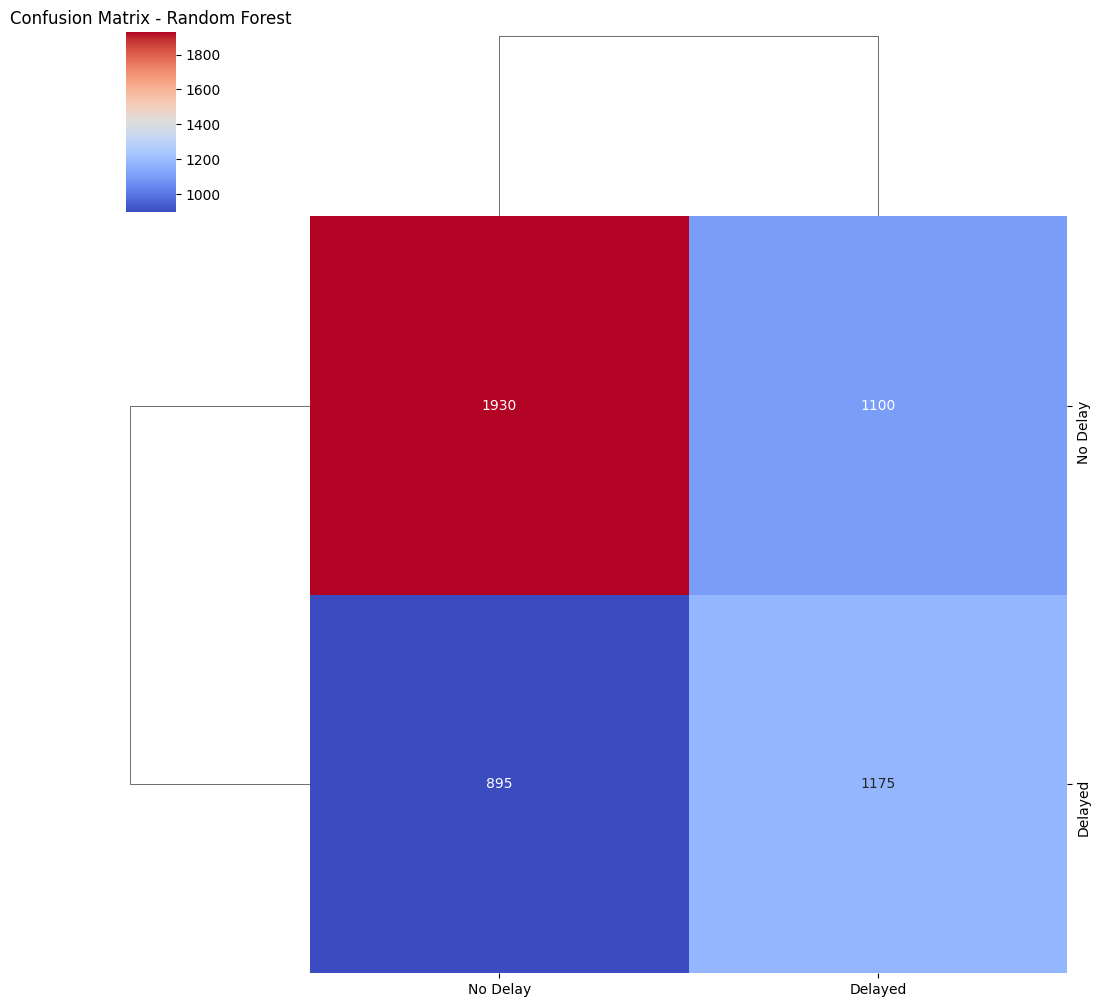

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(pd.DataFrame(cm, index=['No Delay', 'Delayed'], columns=['No Delay', 'Delayed']), annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      3030
           1       0.52      0.57      0.54      2070

    accuracy                           0.61      5100
   macro avg       0.60      0.60      0.60      5100
weighted avg       0.62      0.61      0.61      5100



In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6088235294117647

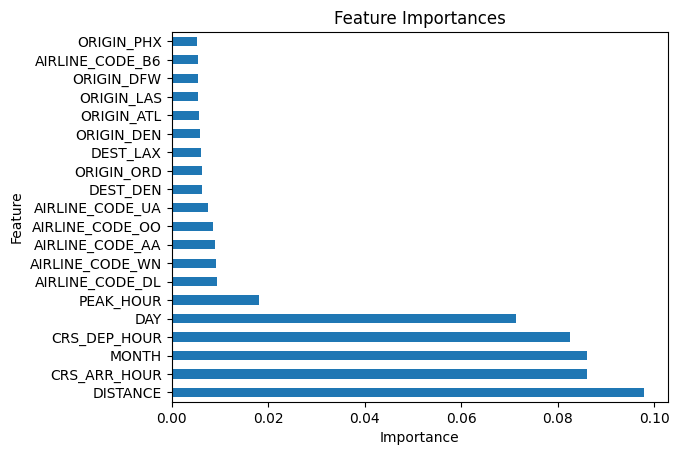

In [40]:
importances = rf.feature_importances_
feature_names = x_train.columns
feat_importance = pd.Series(importances,index=feature_names).sort_values(ascending=False)
feat_importance.head(20).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'n_estimators': [100, 200],'max_depth':[10,15,20],'max_features': ['sqrt','log2']}
tree = RandomForestClassifier()
grid = GridSearchCV(tree,parameters, cv=3, verbose=1)
grid.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             verbose=1)

In [42]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [43]:
y_pred = grid.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [44]:
print("Grid Search Classification Report:\n", classification_report(y_test, y_pred))

Grid Search Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      3030
           1       0.52      0.62      0.57      2070

    accuracy                           0.61      5100
   macro avg       0.61      0.62      0.61      5100
weighted avg       0.63      0.61      0.62      5100



In [45]:

accuracy_score(y_test,y_pred)

0.6147058823529412